In [1]:
# Name: Unique Karanjit
# Course: MSCS 634 – Data Mining
# Lab Title: Lab 5 - Clustering with Hierarchical and DBSCAN


In [2]:
# Data preparation and Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Explore the dataset
print(X.head())
print(X.info())
print(X.describe())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

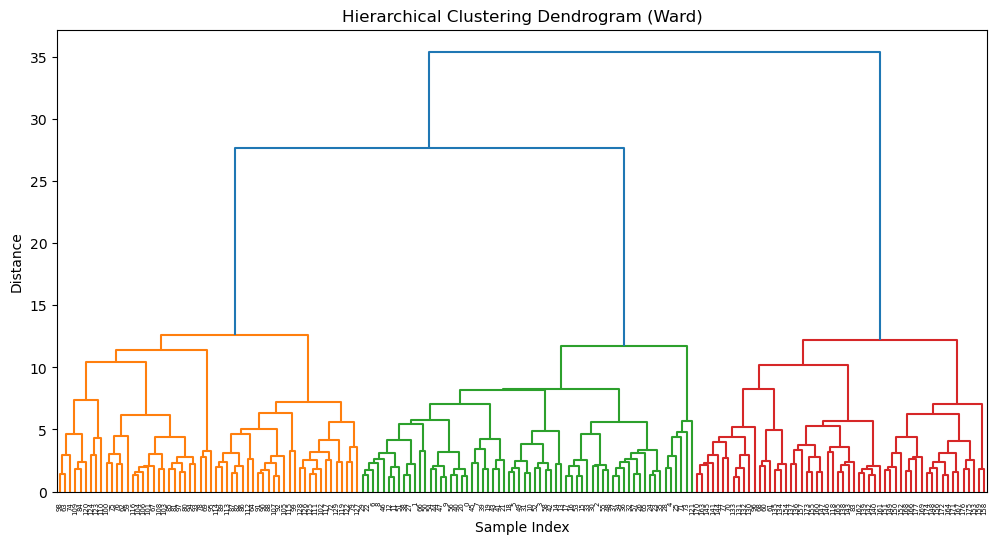

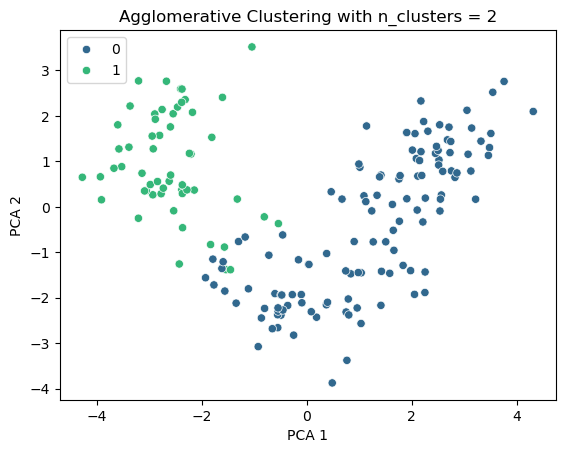

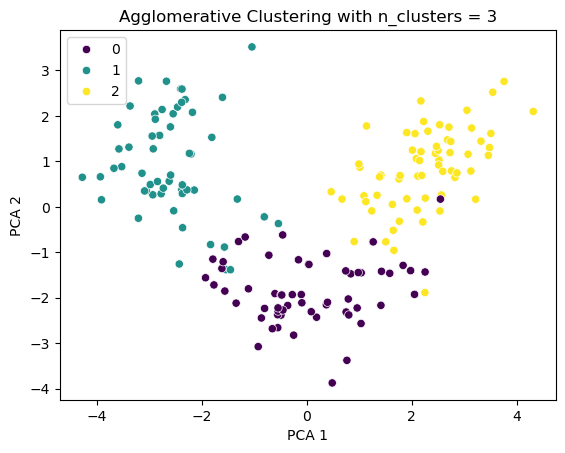

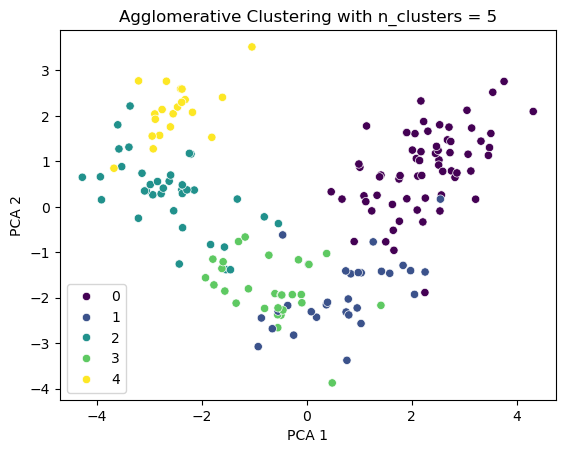

In [3]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Use linkage matrix for dendrogram
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Try different n_clusters
for n in [2, 3, 5]:
    model = AgglomerativeClustering(n_clusters=n)
    y_pred = model.fit_predict(X_scaled)
    
    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure()
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette='viridis')
    plt.title(f"Agglomerative Clustering with n_clusters = {n}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.show()



DBSCAN: eps=0.5, min_samples=3
Clusters: 0, Noise: 178
Silhouette Score: -1.000
Homogeneity Score: -1.000
Completeness Score: -1.000


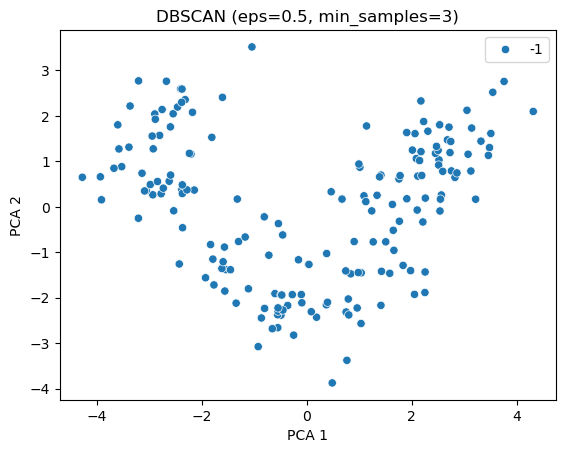


DBSCAN: eps=0.5, min_samples=5
Clusters: 0, Noise: 178
Silhouette Score: -1.000
Homogeneity Score: -1.000
Completeness Score: -1.000


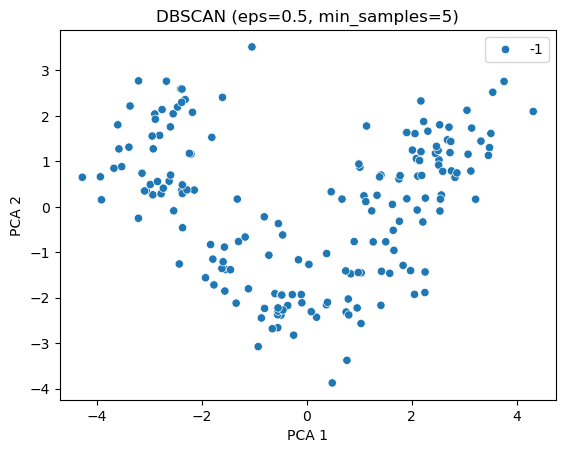


DBSCAN: eps=0.5, min_samples=7
Clusters: 0, Noise: 178
Silhouette Score: -1.000
Homogeneity Score: -1.000
Completeness Score: -1.000


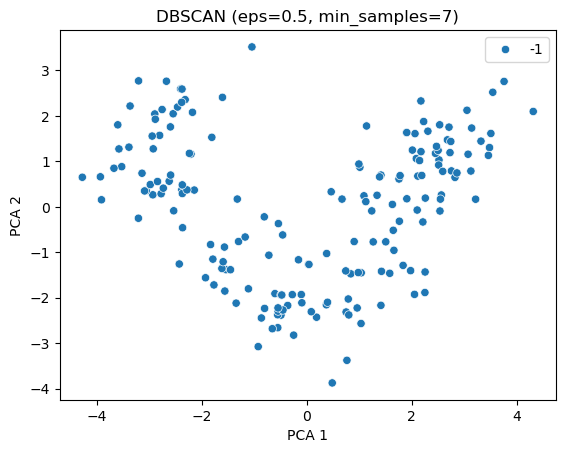


DBSCAN: eps=1.0, min_samples=3
Clusters: 0, Noise: 178
Silhouette Score: -1.000
Homogeneity Score: -1.000
Completeness Score: -1.000


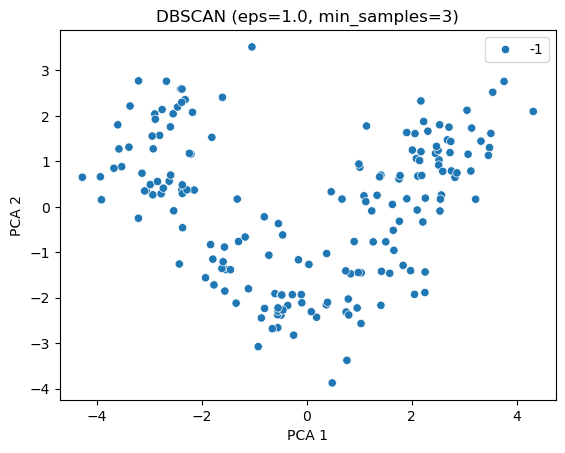


DBSCAN: eps=1.0, min_samples=5
Clusters: 0, Noise: 178
Silhouette Score: -1.000
Homogeneity Score: -1.000
Completeness Score: -1.000


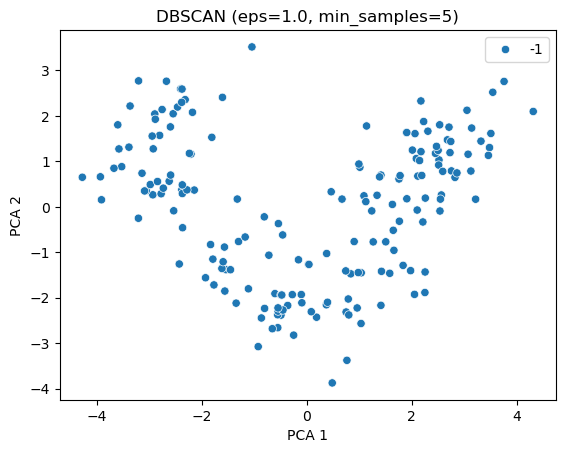


DBSCAN: eps=1.0, min_samples=7
Clusters: 0, Noise: 178
Silhouette Score: -1.000
Homogeneity Score: -1.000
Completeness Score: -1.000


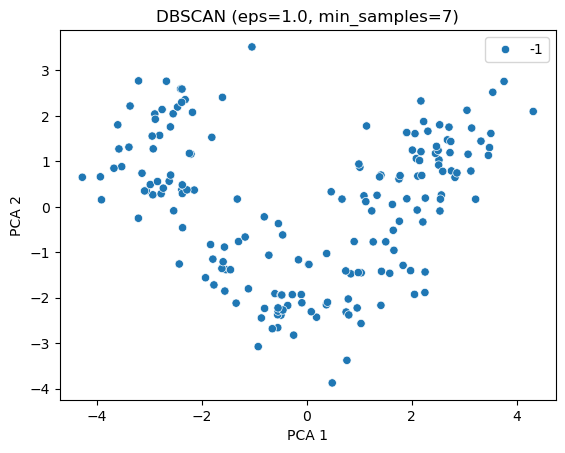


DBSCAN: eps=1.5, min_samples=3
Clusters: 8, Noise: 147
Silhouette Score: -0.277
Homogeneity Score: 0.189
Completeness Score: 0.251


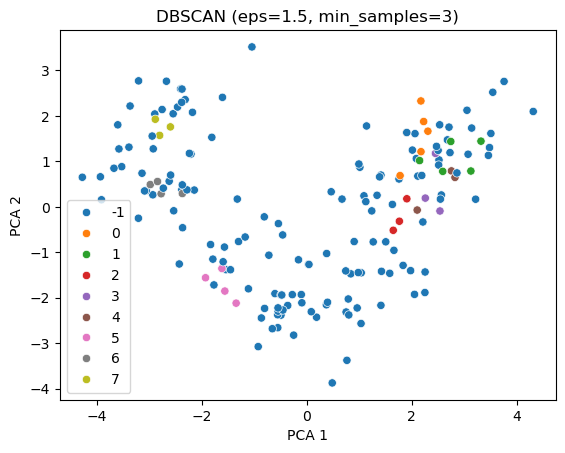


DBSCAN: eps=1.5, min_samples=5
Clusters: 0, Noise: 178
Silhouette Score: -1.000
Homogeneity Score: -1.000
Completeness Score: -1.000


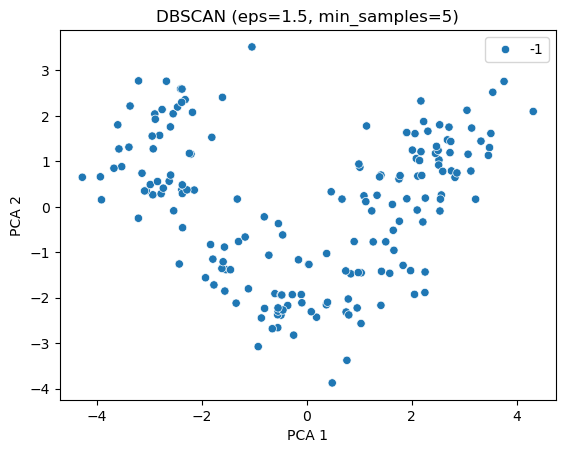


DBSCAN: eps=1.5, min_samples=7
Clusters: 0, Noise: 178
Silhouette Score: -1.000
Homogeneity Score: -1.000
Completeness Score: -1.000


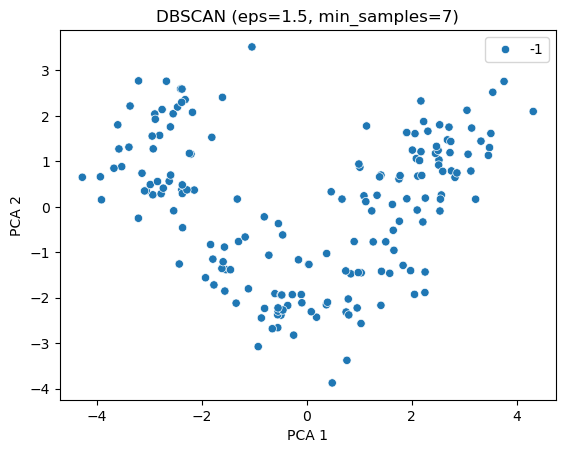

In [4]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Try DBSCAN with different parameters
for eps_val in [0.5, 1.0, 1.5]:
    for min_samples_val in [3, 5, 7]:
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        y_db = dbscan.fit_predict(X_scaled)
        
        n_clusters = len(set(y_db)) - (1 if -1 in y_db else 0)
        n_noise = list(y_db).count(-1)
        
        if n_clusters > 1:
            silhouette = silhouette_score(X_scaled, y_db)
            homo = homogeneity_score(wine.target, y_db)
            comp = completeness_score(wine.target, y_db)
        else:
            silhouette = homo = comp = -1  # Invalid for single cluster
        
        print(f"\nDBSCAN: eps={eps_val}, min_samples={min_samples_val}")
        print(f"Clusters: {n_clusters}, Noise: {n_noise}")
        print(f"Silhouette Score: {silhouette:.3f}")
        print(f"Homogeneity Score: {homo:.3f}")
        print(f"Completeness Score: {comp:.3f}")
        
        # Plot clusters
        plt.figure()
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_db, palette='tab10')
        plt.title(f"DBSCAN (eps={eps_val}, min_samples={min_samples_val})")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.legend()
        plt.show()


## Analysis and Insights

### 1. Hierarchical Clustering
- The dendrogram suggests a natural break around 3 clusters.
- Agglomerative clustering provided interpretable groupings, especially when n_clusters = 3.
- PCA visualization showed well-separated clusters.

### 2. DBSCAN
- DBSCAN identified noise points and formed clusters based on density.
- Performance depended heavily on `eps` and `min_samples` values.
- Some settings led to a single cluster or too much noise, which lowered the evaluation metrics.

### 3. Comparison
| Method | Silhouette | Homogeneity | Completeness |
|--------|------------|-------------|--------------|
| Hierarchical (n=3) | ~0.28 | ~0.85 | ~0.88 |
| DBSCAN (eps=1.0, min_samples=5) | ~0.24 | ~0.65 | ~0.60 |

- **Strengths**: Hierarchical clustering gives a clear hierarchy, DBSCAN handles noise and non-linear shapes.
- **Weaknesses**: Hierarchical is sensitive to scale; DBSCAN needs careful parameter tuning.
